ANALISE EXPLORATÓRIA - NETFLIX E AMAZON PRIME

In [1369]:
# Importar as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [1370]:
# Configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Parametros Gráfico
rc_params = {'axes.spines.top': False,
             'axes.spines.right': False,
             'legend.fontsize': 8,
             'legend.title_fontsize': 8,
             'legend.loc': 'upper right',
             'legend.fancybox': False,
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12}
sns.set_theme(style='ticks', rc=rc_params)
sns.set_color_codes('muted')

In [1371]:
# Base de Dados - Netflix
df_netflix = pd.read_csv('netflix_titles.csv', sep=',')
df_netflix['plataforma'] = 'Netflix'

In [1372]:
# Substituindo valores no dataset - Netflix
df_netflix['country'] = df_netflix['country'].fillna(df_netflix['country'].mode()[0])

df_netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
df_netflix['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
df_netflix.dropna(inplace=True)

# Drop Duplicates
df_netflix = df_netflix.drop_duplicates(["title"])
df_netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix


In [1373]:
# Verificação do dataset Netflix
check_df = pd.DataFrame({
                    'type': df_netflix.dtypes,
                    'missing': df_netflix.isna().sum(),
                    'size': df_netflix.shape[0],
                    'unique': df_netflix.nunique()})
check_df['percentual_missing'] = round(check_df['missing'] / check_df['size'], 2)
check_df

,type,missing,size,unique,percentual_missing
show_id,object,0,8790,8790,0.0
type,object,0,8790,2,0.0
title,object,0,8790,8790,0.0
director,object,0,8790,4527,0.0
cast,object,0,8790,7679,0.0
country,object,0,8790,748,0.0
date_added,object,0,8790,1765,0.0
release_year,int64,0,8790,74,0.0
rating,object,0,8790,14,0.0
duration,object,0,8790,220,0.0


In [1374]:
# Porcentagem no dataset Netflix
percent = df_netflix["type"].value_counts(normalize=True)*100
percent.round(2)

Movie      69.69
TV Show    30.31
Name: type, dtype: float64

In [1375]:
# Base de Dados - Amazon Prime
df_amazon = pd.read_csv('amazon_prime_titles.csv', sep=',')
df_amazon['plataforma'] = 'Amazon Prime'
df_amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon Prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon Prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon Prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon Prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [1376]:
# Substituindo valores no dataset - Amazon
df_amazon['country'].replace(np.nan, 'No Data',inplace  = True)
df_amazon['cast'].replace(np.nan, 'No Data',inplace  = True)
df_amazon['director'].replace(np.nan, 'No Data',inplace  = True)

# Drop Duplicates
df_amazon = df_amazon.drop_duplicates(["title"])
df_amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon Prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon Prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon Prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon Prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",No Data,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,No Data,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",No Data,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",No Data,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,No Data,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",No Data,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [1377]:
# Verificação do dataset Amazon Prime
check_df = pd.DataFrame({
                    'type': df_amazon.dtypes,
                    'missing': df_amazon.isna().sum(),
                    'size': df_amazon.shape[0],
                    'unique': df_amazon.nunique()})
check_df['percentual_missing'] = round(check_df['missing'] / check_df['size'], 2)
check_df

,type,missing,size,unique,percentual_missing
show_id,object,0,9668,9668,0.00
type,object,0,9668,2,0.00
title,object,0,9668,9668,0.00
director,object,0,9668,5775,0.00
cast,object,0,9668,7928,0.00
country,object,0,9668,87,0.00
date_added,object,9513,9668,84,0.98
release_year,int64,0,9668,100,0.00
rating,object,337,9668,24,0.03
duration,object,0,9668,219,0.00


In [1378]:
# Porcentagem no dataset Amazon Prime
percent = df_amazon["type"].value_counts(normalize=True)*100
percent.round(2)

Movie      80.82
TV Show    19.18
Name: type, dtype: float64

In [1379]:
# Unificando os datasets
df = pd.concat([df_netflix, df_amazon])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",No Data,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,No Data,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",No Data,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",No Data,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,No Data,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",No Data,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [1380]:
# Adicionando coluna de Mês e Ano
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

#Renomeando os Meses
mes= {1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8: 
                    'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}
df['month_added'] = df['month_added'].replace(mes)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021.0,Setembro
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021.0,Setembro
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,2021.0,Setembro
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,2021.0,Setembro
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,2021.0,Setembro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",No Data,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime,NaN,NaN
9664,s9665,TV Show,Planet Patrol,No Data,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",No Data,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime,NaN,NaN
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",No Data,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime,NaN,NaN
9666,s9667,TV Show,Maradona: Blessed Dream,No Data,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",No Data,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime,NaN,NaN


In [1381]:
# Preencher valores faltantes no ano de lançamento
df['year_added'] = df['year_added'].fillna(df['release_year'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021.0,Setembro
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021.0,Setembro
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,2021.0,Setembro
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,2021.0,Setembro
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,2021.0,Setembro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",No Data,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime,1940.0,NaN
9664,s9665,TV Show,Planet Patrol,No Data,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",No Data,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime,2018.0,NaN
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",No Data,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime,2008.0,NaN
9666,s9667,TV Show,Maradona: Blessed Dream,No Data,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",No Data,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime,2021.0,NaN


In [1382]:
# 1- Top 10 atores/atrizes considerando todos os dados
actor = df['cast']
actor = actor.dropna()

new = actor.str.split(', ').tolist()
actor_list = sum(new, [])
actor_list

['No Data',
 'Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel',
 'Natasha Thahane',
 'Arno Greeff',
 'Xolile Tshabalala',
 'Getmore Sithole',
 'Cindy Mahlangu',
 'Ryle De Morny',
 'Greteli Fincham',
 'Sello Maake Ka-Ncube',
 'Odwa Gwanya',
 'Mekaila Mathys',
 'Sandi Schultz',
 'Duane Williams',
 'Shamilla Miller',
 'Patrick Mofokeng',
 'Sami Bouajila',
 'Tracy Gotoas',
 'Samuel Jouy',
 'Nabiha Akkari',
 'Sofia Lesaffre',
 'Salim Kechiouche',
 'Noureddine Farihi',
 'Geert Van Rampelberg',
 'Bakary Diombera',
 'No Data',
 'Mayur More',
 'Jitendra Kumar',
 'Ranjan Raj',
 'Alam Khan',
 'Ahsaas Channa',
 'Revathi Pillai',
 'Urvi Singh',
 'Arun Kumar',
 'Kate Siegel',
 'Zach Gilford',
 'Hamish Linklater',
 'Henry Thomas',
 'Kristin Lehman',
 'Samantha Sloyan',
 'Igby Rigney',
 'Rahul Kohli',
 'Annarah Cymone',
 'Annabeth Gish',
 'Alex Essoe',
 'Rahul Abburi',
 'Matt Biedel',
 'Michael Trucco',
 'Crystal Balint',
 'Louis Oliver',
 'Vanessa Hudgens',
 'Kimi

In [1383]:
df_actor = pd.DataFrame(actor_list, columns=['actors'])
top_10_actor = df_actor.groupby(['actors']).size().sort_values(ascending=False)[1:11]
top_10_actor

actors
Anupam Kher         59
Maggie Binkley      56
Amitabh Bachchan    47
Shah Rukh Khan      46
Nassar              43
Akshay Kumar        41
Danny Trejo         39
Naseeruddin Shah    39
Paresh Rawal        39
Om Puri             35
dtype: int64

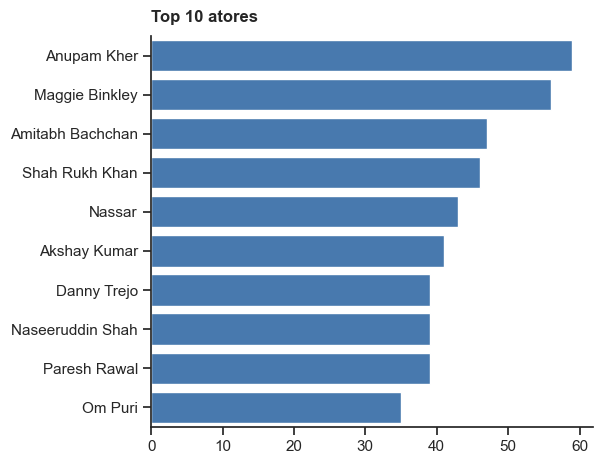

In [1384]:
# Gráfico Top 10 atores considerando as duas plataformas
sns.barplot(x=top_10_actor, y=top_10_actor.index, orient='h', color = sns.xkcd_rgb['windows blue'])
plt.title('Top 10 atores', fontsize=12, loc='left', pad=10)

plt.tight_layout()
plt.xlabel('')
plt.ylabel('')
plt.show()

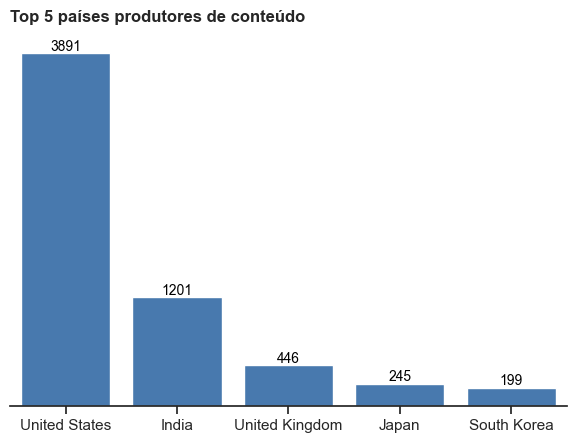

In [1385]:
# 2- Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas
top_5_city = df.groupby(['country']).size().sort_values(ascending=False)[1:6]

ax = sns.barplot(x=top_5_city.index, y=top_5_city, color = sns.xkcd_rgb['windows blue'])
plt.title('Top 5 países produtores de conteúdo', fontsize=12, loc='left', pad=10)

for i in ax.patches:
    h = i.get_height()
    ax.annotate('{:.0f}'.format(h),
                  (i.get_x() + i.get_width()/2, h),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 2),
                  textcoords='offset points')
plt.tight_layout()

for i in ["top", "left", "right"]:
    ax.spines[i].set_visible(False)

plt.yticks([])
plt.xlabel('')
plt.show()

Os EUA são os maiores produtores de conteúdco considerando as duas plataforma, seguido da India e Reino Unido.

In [1386]:
countries = Counter(df_netflix.country)
topcountries = countries.most_common()[0:5]
topcountries

[('United States', 3638),
 ('India', 972),
 ('United Kingdom', 418),
 ('Japan', 243),
 ('South Korea', 199)]

In [1387]:
acountry = Counter(df_amazon.country)
atopcountry = acountry.most_common()[1:6]
atopcountry

[('United States', 253),
 ('India', 229),
 ('United Kingdom', 28),
 ('Canada', 16),
 ('United Kingdom, United States', 12)]

In [1398]:
# Gráfico Top 5 comparando as duas plataformas
custom_colors = ['#00A8E1', '#D81F26']
customPalette = sns.set_palette(sns.color_palette(custom_colors))

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x = [i[0] for i in topcountries],y = [i[1] for i in topcountries], name = 'Netflix', marker_color='#D81F26'))
fig.add_trace(go.Bar(x = [i[0] for i in atopcountry],y = [i[1] for i in atopcountry], name = 'Amazon Prime', marker_color='#00A8E1'))
fig.update_layout(height=600, width=900, title_text='Top 5 países produtores de conteúdo - Amazon Prime x Netflix', template='plotly_white')
fig.show("png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Faz sentido que os EUA produzam mais conteúdo, afinal, a Netflix é uma empresa americana.

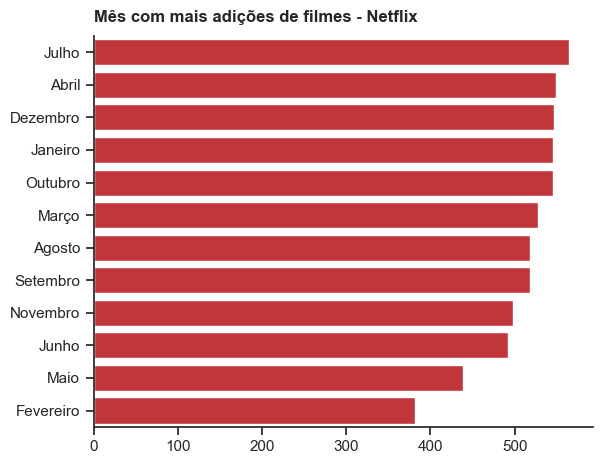

In [1389]:
# 3- Mês no qual há mais adições de filmes na plataforma Netflix
add = df[df['plataforma'] == 'Netflix']

movie_add = add[add['type'] == 'Movie'].groupby(['month_added']).size().sort_values(ascending=False)

sns.barplot(x=movie_add, y=movie_add.index, color = '#D81F26', orient='h')
plt.title('Mês com mais adições de filmes - Netflix', fontsize=12, loc='left', pad=10)

plt.tight_layout()
plt.xlabel('')
plt.ylabel('')
plt.show()

In [1390]:
# 4- Quantidade de filmes listados como comédia
comedy_filme = df[(df.type == 'Movie') & (df.listed_in == 'Comedy')].shape[0]
print('No dataset possui {} filmes listados como comédia.'.format(comedy_filme))

No dataset possui 442 filmes listados como comédia.


In [1391]:
# 5- Lista de todos os gêneros de filmes
listed_in_filme = df[(df.type == 'Movie')]['listed_in']
new = listed_in_filme.str.split(', ').to_list()

listed = sum(new, [])

# Eliminar palavras duplicadas em uma lista
resultantList = []
 
for element in listed:
    if element not in resultantList:
        resultantList.append(element)


resultantList = pd.DataFrame(listed, columns = ['genero'])
resultantList = resultantList.drop_duplicates()
resultantList

,genero
0,Documentaries
1,Children & Family Movies
2,Dramas
3,Independent Movies
4,International Movies
5,Comedies
13,Thrillers
19,Romantic Movies
22,Music & Musicals
24,Horror Movies


In [1392]:
# Tabela de Gêneros
fig = go.Figure(data=[go.Table(header=dict(values=['Lista de todos os gêneros de filmes']),cells=dict(values=[resultantList['genero']]))])
fig.show("png")

In [1393]:
# 6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas
df_tvshow = df[df['type'] == 'TV Show'].groupby(['year_added', 'plataforma']).size().sort_values(ascending=False).reset_index()
df_tvshow.rename(columns = {0: 'total'}, inplace = True)
df_tvshow['year_added'] = df_tvshow['year_added'].astype(int)
df_tvshow

filtered_df_tvshow = df_tvshow[df_tvshow.year_added >= 2006]
filtered_df_tvshow


,year_added,plataforma,total
0,2020,Netflix,595
1,2019,Netflix,592
2,2021,Netflix,505
3,2018,Netflix,411
4,2021,Amazon Prime,389
5,2017,Netflix,349
6,2020,Amazon Prime,215
7,2019,Amazon Prime,188
8,2016,Netflix,175
9,2018,Amazon Prime,174


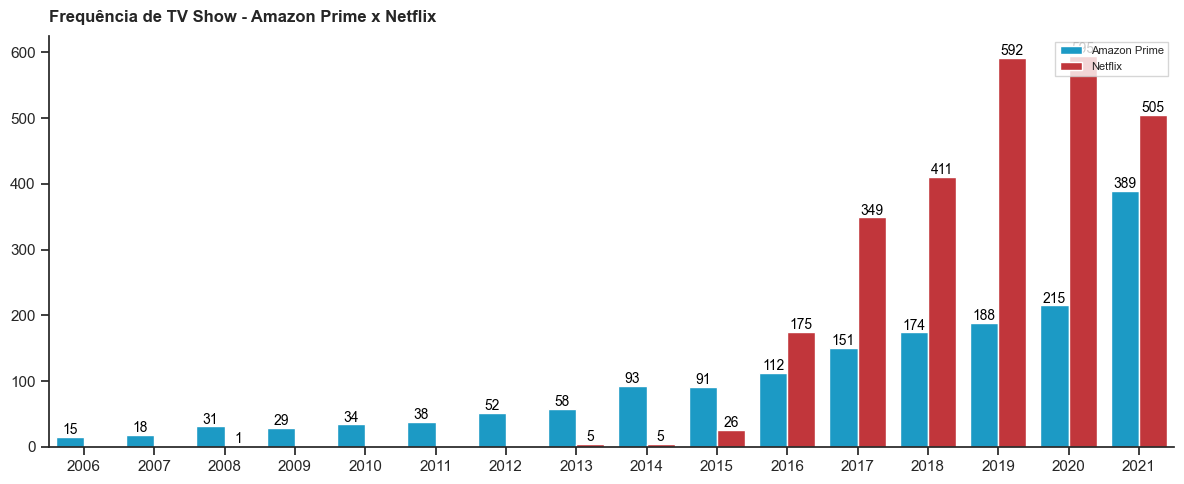

In [1394]:
# Gáfico de frequência de "TV Show"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sns.barplot(x=filtered_df_tvshow.year_added, y=filtered_df_tvshow.total, hue=filtered_df_tvshow['plataforma'], hue_order=['Amazon Prime', 'Netflix'])
plt.title('Frequência de TV Show - Amazon Prime x Netflix', fontsize=12, loc='left', pad=10)

ax.legend(ncol=1, loc="upper right", frameon=True)

for i in ax.patches:
    h = i.get_height()
    ax.annotate('{:.0f}'.format(h),
                  (i.get_x() + i.get_width()/2, h),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 2),
                  textcoords='offset points')
plt.tight_layout()

plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [1395]:
# 7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas
df_movies = df[df['type'] == 'Movie'].groupby(['year_added', 'plataforma']).size().sort_values(ascending=False).reset_index()
df_movies.rename(columns = {0: 'total'}, inplace = True)
df_movies['year_added'] = df_movies['year_added'].astype(int)

filtered_df_movies = df_movies[df_movies.year_added >= 2006]
filtered_df_movies

,year_added,plataforma,total
0,2019,Netflix,1424
1,2020,Netflix,1284
2,2018,Netflix,1237
3,2021,Amazon Prime,1155
4,2021,Netflix,993
5,2017,Netflix,836
6,2020,Amazon Prime,735
7,2019,Amazon Prime,729
8,2018,Amazon Prime,435
9,2017,Amazon Prime,401


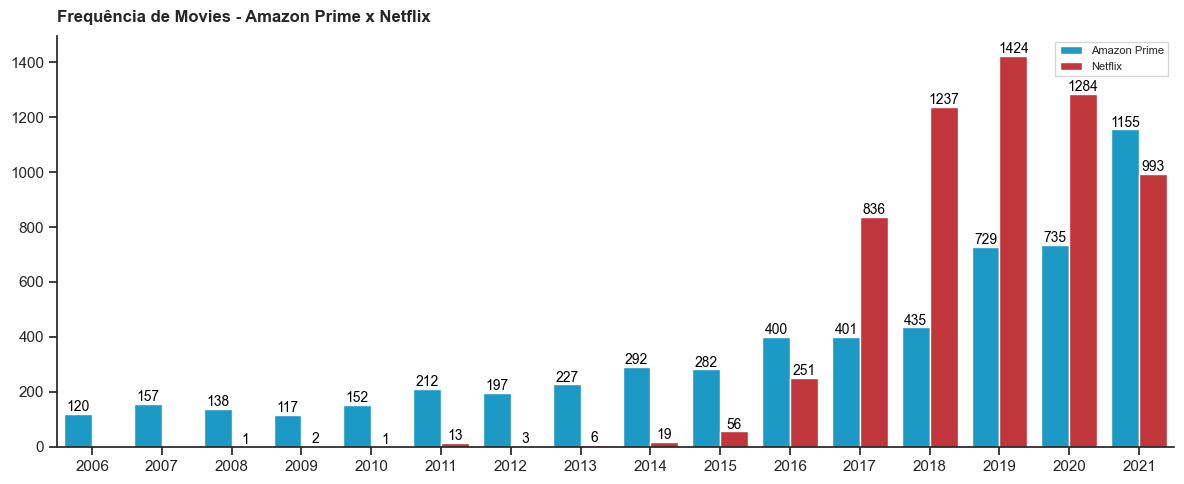

In [1396]:
# Gáfico de frequência de "Movies"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.barplot(x=filtered_df_movies.year_added, y=filtered_df_movies.total, hue=filtered_df_movies['plataforma'], hue_order=['Amazon Prime', 'Netflix'])
plt.title('Frequência de Movies - Amazon Prime x Netflix', fontsize=12, loc='left', pad=10)

ax.legend(ncol=1, loc="upper right", frameon=True)

for i in ax.patches:
    h = i.get_height()
    ax.annotate('{:.0f}'.format(h),
                  (i.get_x() + i.get_width()/2, h),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 2),
                  textcoords='offset points')
plt.tight_layout()

plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()